## Memprediksi Harga Jual Rumah

Tujuan dari proyek ini adalah membangun model Machine Learning untuk memprediksi harga jual rumah berdasarkan berbagai variabel penjelas yang menggambarkan aspek rumah hunian.


### Mengapa ini penting?

Memprediksi harga rumah berguna untuk mengidentifikasi investasi yang menguntungkan atau untuk menentukan apakah harga rumah yang diiklankan di atas atau di bawah perkiraan.


### Apa tujuan dari model Machine Learning?

Bertujuan untuk meminimalkan perbedaan antara harga sebenarnya dan harga yang diperkirakan oleh model. <br>
Model akan mengevaluasi performa model dengan:

1. mean squared error (mse)
2. akar pangkat dua dari kesalahan kuadrat rata-rata (rmse)
3. r-score (r2).

In [9]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

#spliiting data train and test
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Function
def missing(df):
    missing = df.isnull().sum()
    percent = round(100*(missing/df.shape[0]),2)
    types = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"missing":missing,
                        "percent_missing":percent,
                        "types":types,
                        "n_unique":n_unique}).sort_values("percent_missing",ascending=False)

In [10]:
from pathlib import Path
PATH = Path.cwd().parent
DDIR = PATH / "Dataset"

df = pd.read_csv(f'{DDIR}/train.csv')

In [11]:
missing(df)

,missing,percent_missing,types,n_unique
PoolQC,1453,99.52,object,3
MiscFeature,1406,96.30,object,4
Alley,1369,93.77,object,2
Fence,1179,80.75,object,4
FireplaceQu,690,47.26,object,5
...,...,...,...,...
ExterQual,0,0.00,object,4
Exterior2nd,0,0.00,object,16
Exterior1st,0,0.00,object,15
RoofMatl,0,0.00,object,8


In [12]:
#buat variabel yang mengandung missing value lebih dari 50%
#umumnya kalo <50%, masih bisa digunakan informasinya. (rule of thumb)

var_drop = [var for var in df.columns if df[var].isnull().sum()/len(df)> 0.5]
var_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

**.drop()** digunakan untuk mendrop kolom pada dataframe, 
Note : drop kolom gunakan axis = 1

In [13]:
#drop variabelnya
df = df.drop(columns=var_drop,axis=1)

In [15]:
df = df.drop('Id',axis=1)

<h2>Analisis Missing Value</h2>

In [21]:
#pisahkan variabel categorikal dan numerikal

#categorikal variabel
cat_vars = [var for var in df.columns if df[var].dtype == 'O'] #O untuk object
cat_vars = cat_vars + ['MSSubClass'] #MSSubclass sebelumnya kategorikal, namun diubah menjadi angka, jadi tambahkan seperti dahulu

num_vars = [var for var in df.columns if var not in cat_vars and var!= 'SalePrice']

In [22]:
#membuat list baru yang menampung variable nan untuk analisa

vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]
df[vars_with_na].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [24]:
#pisahkan data kategorikal dan numerik yang missing

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]
print(len(cat_na),len(num_na))

12 3


In [25]:
#analisa na value:
def analyze_na_value(df,var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(),1,0) #kalau di df[var] ada yang null, keluarkan 1, jika tidak maka keluarkan 0
    
    tmp = df.groupby(var)['SalePrice'].agg(['mean','std'])

    tmp.plot(kind='barh',y='mean',legend=False,
             xerr='std',color='green')
    plt.show()

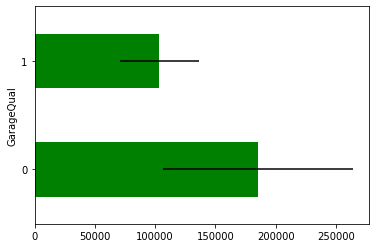

In [26]:
analyze_na_value(df,"GarageQual")

#yang missing dengan harga rendah, dan yang tidak missing itu harga tingig, jadi bisa digunakan datanya.

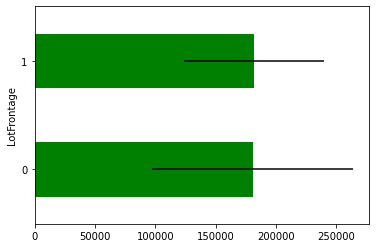

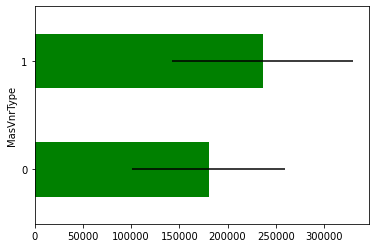

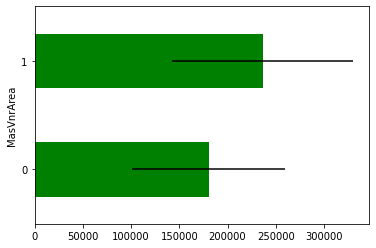

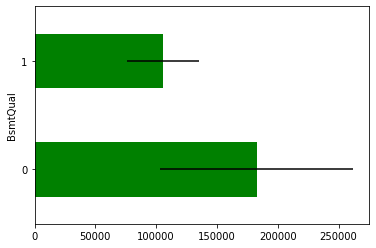

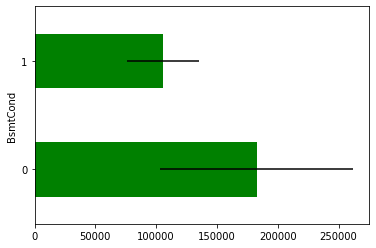

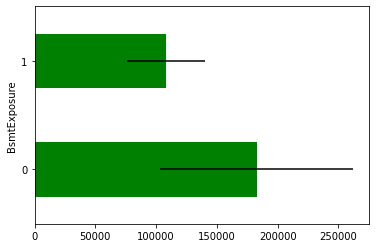

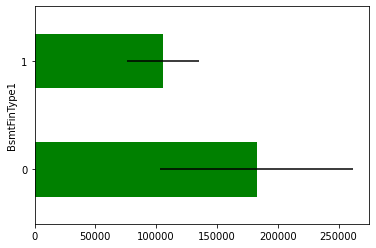

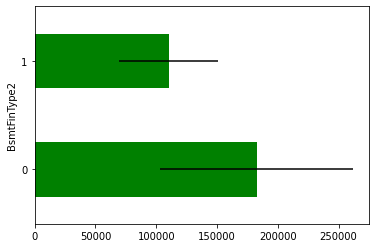

c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


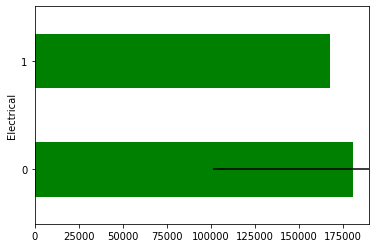

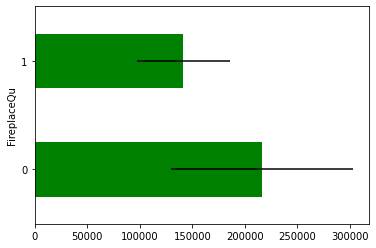

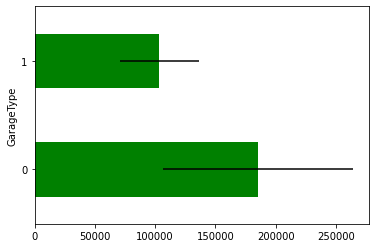

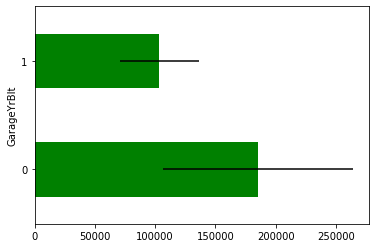

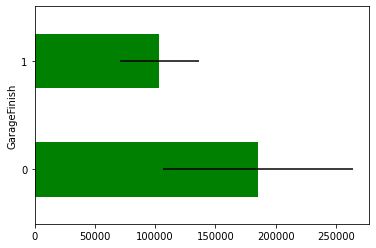

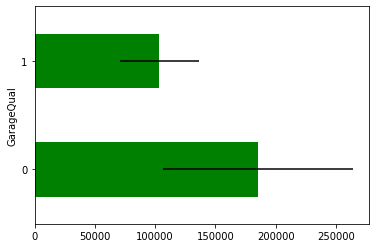

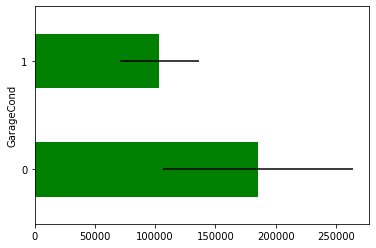

In [27]:
#looping
for var in (vars_with_na):
    analyze_na_value(df,var)